In [ ]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.core.display import display, HTML

import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import ipywidgets as widgets

In [ ]:
df=pd.read_csv('Employee_Attrition_Data.csv')

In [ ]:
df.info()

In [ ]:
count=df.shape
print(count)

(1470, 23)


In [ ]:
df[df.duplicated()]

In [ ]:
print('Data columns with null values:',df.isnull().sum(), sep = '\n')

In [ ]:
df = df.drop(columns="TotalWorkingYears")
df = df.drop(columns="PerformanceRating")
df = df.drop(columns="StandardHours")
df = df.drop(columns="BusinessTravel")

In [ ]:
df.describe()

In [ ]:
print(df)

<h1> Data Visualization</h1>

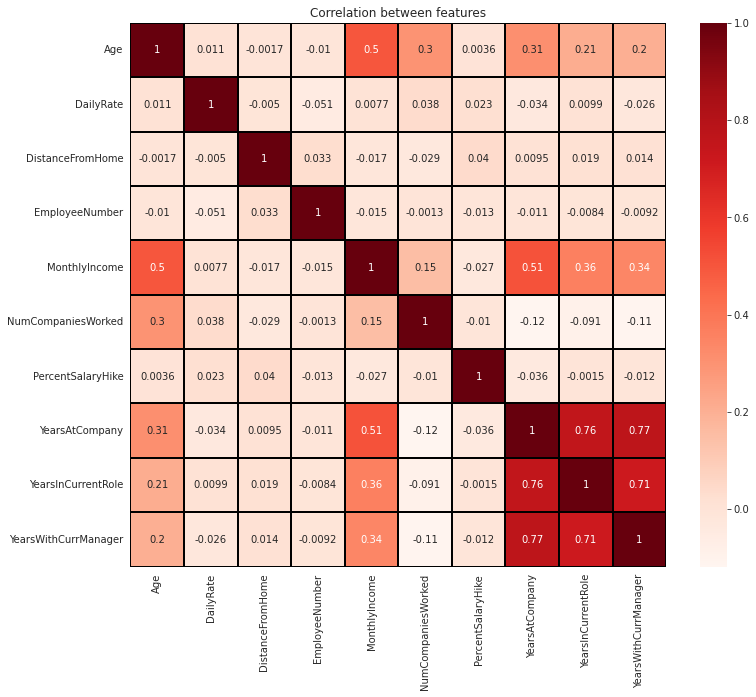

In [ ]:
plt.figure(figsize=(12,10))
plt.title(label = "Correlation between features")
cor = df.corr()
linewidths = 1
linecolor = "black"
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, annot_kws={'size': 10}, linewidths=linewidths,linecolor=linecolor)
plt.show()

In [ ]:
age_att=df.groupby(['Age','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Employee Count')
fig = px.line(age_att,x='Age',y='Employee Count',color='Attrition', 
           color_discrete_map={
                 "Attrition": "green",
                              },title='Agewise Attrition Count in an Organization',category_orders={"Attrition":["Yes","No"]})

fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})

fig.show()

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

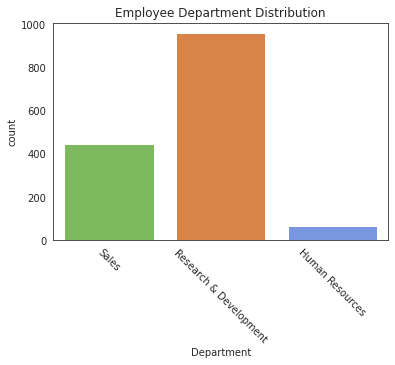

In [ ]:
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Department', data=df, palette=color_types).set_title('Employee Department Distribution')
 
# Rotate x-labels
plt.xticks(rotation=-45)

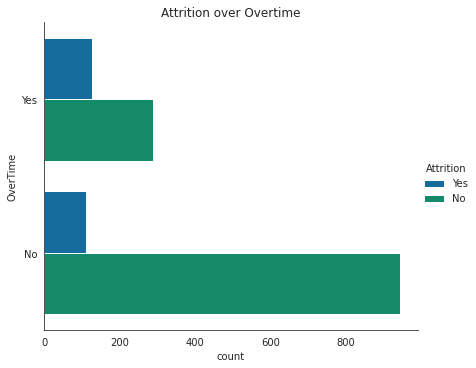

In [ ]:
#f, ax = plt.subplots(figsize=(10, 5))
sns.catplot(y="OverTime", hue="Attrition", 
                data=df, kind="count",
                height=5, aspect=1.2).set(title ="Attrition over Overtime");
#sns.countplot(y="OverTime", hue='Attrition', data=df)

In [ ]:
#f, ax = plt.subplots(figsize=(10, 5))
#sns.countplot(y="Gender", hue='Attrition', data=df)
ax=sns.catplot(y="Gender", hue="Attrition", 
                data=df, kind="count",
                height=5, aspect=1.2).set(title ="Attrition over Gender")

In [ ]:
#f, ax = plt.subplots(figsize=(10, 5))
#sns.countplot(y="Department", hue='Attrition', data=df)
ax=sns.catplot(y="Department", hue="Attrition", 
                data=df, kind="count",
                height=5, aspect=1.2).set(title ="Attrition over Department")

In [ ]:
df['Income_Range']=pd.cut(df['MonthlyIncome'],[1000,5000,10000,15000,20000])
#f, ax = plt.subplots(figsize=(8, 4))
#sns.countplot(y='Income_Range',hue='Attrition',data=df).set_title('Employee Salary Attrition Distribution')
ax=sns.catplot(y="Income_Range", hue="Attrition", 
                data=df, kind="count",
                height=5, aspect=1.2).set(title ="Attrition over Income")

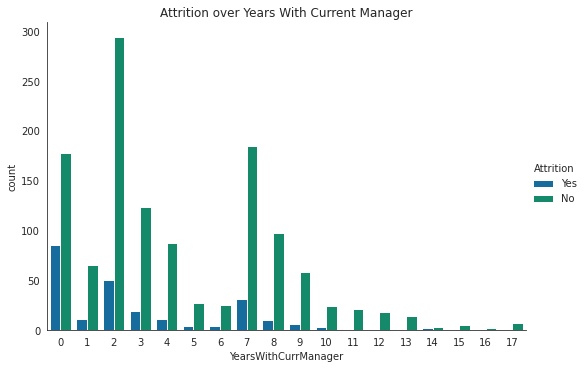

In [ ]:
#fig=plt.figure(figsize=(10,6))
#sns.countplot(x='YearsWithCurrManager',hue='Attrition',data=df)
ax=sns.catplot(x="YearsWithCurrManager", hue="Attrition", 
                data=df, kind="count",
                height=5, aspect=1.5).set(title ="Attrition over Years With Current Manager")
#plt.show()

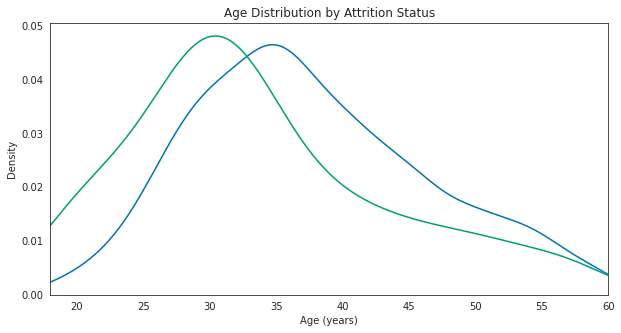

In [ ]:
plt.figure(figsize=(10,5))
plt.style.use('seaborn-colorblind')
#plt.grid(False, alpha=0)
sns.kdeplot(df.loc[df['Attrition'] == 'No', 'Age'], label = 'Active Employee')
sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'Age'], label = 'Ex-Employees')
plt.xlim(left=18, right=60)
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Age Distribution by Attrition Status');

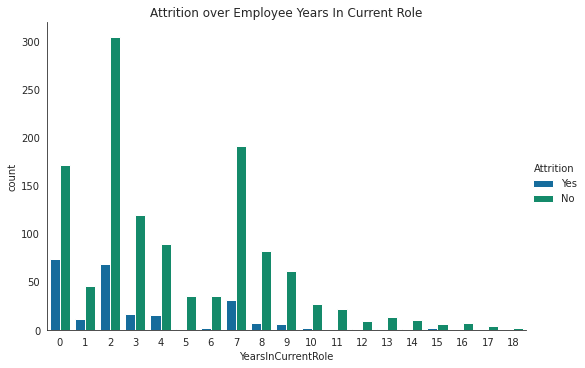

In [ ]:
#fig=plt.figure(figsize=(10,5))
#sns.countplot(x='YearsInCurrentRole',hue='Attrition',data=df,color='green')
ax=sns.catplot(x="YearsInCurrentRole", hue="Attrition", 
                data=df, kind="count",
                height=5, aspect=1.5).set(title ="Attrition over Employee Years In Current Role");
plt.show()

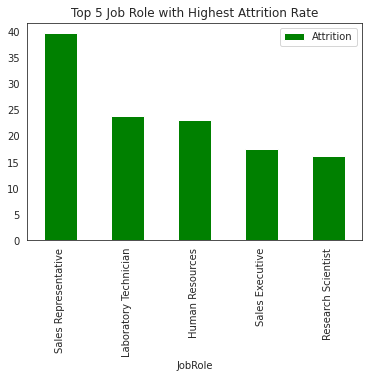

In [ ]:
df_JobRole = pd.DataFrame(columns=["JobRole", "Attrition"])
i=0
for field in list(df['JobRole'].unique()):
    ratio = df[(df['JobRole']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['JobRole']==field].shape[0]
    df_JobRole.loc[i] = (field, ratio*100)
    i += 1    
df_new_JobRole = df_JobRole.groupby(by="JobRole").sum()
dff=df_new_JobRole.nlargest(5,"Attrition", keep='last')
fig = dff.plot(kind='bar', title ='Top 5 Job Role with Highest Attrition Rate', color = 'green', grid = False)

In [ ]:
#Correlation with output variable
target_var = abs(cor["YearsWithCurrManager"])
#Selecting highly correlated features
high_corr_features = target_var[target_var>0.5]
high_corr_features

YearsAtCompany          0.769212
YearsInCurrentRole      0.714365
YearsWithCurrManager    1.000000
Name: YearsWithCurrManager, dtype: float64

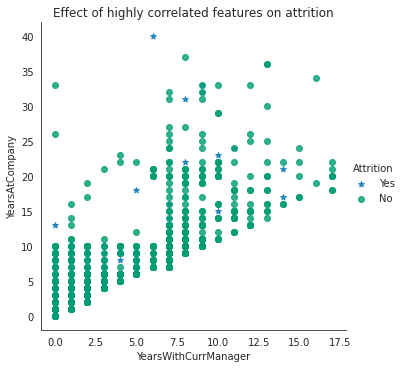

<Figure size 864x864 with 0 Axes>

In [ ]:
sns.set_style(style='white')
sns.lmplot(x='YearsWithCurrManager',y='YearsAtCompany',hue='Attrition',data=df, markers=['*', 'o'],fit_reg=False).set(title = "Effect of highly correlated features on attrition")
plt.figure(figsize=(12,12))
plt.show()

In [ ]:
f , axes = plt.subplots(2,2, figsize = (15,10))
f.suptitle("Distribution of different attributes ")


df['Income_Range']=pd.cut(df['MonthlyIncome'],[1000,5000,10000,15000,20000])

sns.countplot(y="Department", hue='Attrition', data=df, ax = axes[0,0]).set_title('Employee Department Attrition Distribution')
sns.countplot(y='Income_Range',hue='Attrition',data=df, ax = axes[0,1]).set_title("Employee Salary Attrition Distribution")
sns.countplot(y="Gender", hue='Attrition', data=df, ax = axes[1,0]).set_title("Employee Gender Attrition Distribution")
sns.countplot(y="OverTime", hue='Attrition', data=df, ax = axes[1,1]).set_title("Employee Overtime Attrition Distribution")

In [ ]:
def bubble_chart(n):
    
    fig = px.scatter(df.head(n), x="JobRole", y="MonthlyIncome", size="MonthlyIncome", color="JobRole",
               hover_name="JobRole", size_max=60)
    fig.update_layout(
    title=str(n) +" Top Salaried roles",
    xaxis_title="Job Role",
    yaxis_title="Monthly Income",
    width = 700
    )
    fig.show();

interact(bubble_chart, n=10)

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none'
widgets.VBox([fig], layout=ipywLayout)

interactive(children=(IntSlider(value=10, description='n', max=30, min=-10), Output()), _dom_classes=('widget-…

TraitError: ignored

In [ ]:
# Data
Newly_Joined_Employees_df = pd.read_csv('/content/time_series_Global_Employee_Joined_Statistics.csv')
Newly_Left_Employees_df = pd.read_csv('/content/time_series_Global_Employee_Resign_Statistics.csv')
country_df = pd.read_csv('/content/time_series_Global_Employee_Country_Statistics_1.csv')

In [ ]:
# data cleaning

# renaming the df column names to lowercase
Newly_Joined_Employees_df.columns = map(str.lower, Newly_Joined_Employees_df.columns)
Newly_Left_Employees_df.columns = map(str.lower, Newly_Left_Employees_df.columns)
country_df.columns = map(str.lower, country_df.columns)

# changing province/state to state and country/region to country
Newly_Joined_Employees_df = Newly_Joined_Employees_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
Newly_Left_Employees_df = Newly_Left_Employees_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
country_df = country_df.rename(columns={'country_region': 'country'})

In [ ]:
country_df.head()

In [ ]:
# total number of joined, resigned employees
joined_total = int(country_df['joined'].sum())
resigned_total = int(country_df['resigned'].sum())


In [ ]:
def plot_attrition_of_a_company(country):
    labels = ['Joined', 'Resigned']
    colors = ['blue', 'green']
    mode_size = [6, 8]
    line_size = [2, 3]
    
    df_list = [Newly_Joined_Employees_df, Newly_Left_Employees_df]
    
    fig = go.Figure();
    
    for i, df in enumerate(df_list):
        if country == 'World' or country == 'world':
            x_data = np.array(list(df.iloc[:, 20:].columns))
            y_data = np.sum(np.asarray(df.iloc[:,4:]),axis = 0)
            
        else:    
            x_data = np.array(list(df.iloc[:, 20:].columns))
            y_data = np.sum(np.asarray(df[df['country'] == country].iloc[:,20:]),axis = 0)
            
        fig.add_trace(go.Scatter(x=x_data, y=y_data, mode='lines+markers',
        name=labels[i],
        line=dict(color=colors[i], width=line_size[i]),
        connectgaps=True,
        text = "Total " + str(labels[i]) +": "+ str(y_data[-1])
        ));
    
    fig.update_layout(
        title="Number of Joined and Resigned Employees in " + country,
        xaxis_title='Date',
        yaxis_title='Employee Count',
        margin=dict(l=20, r=20, t=40, b=20),
        paper_bgcolor="white",
        width = 800,
        
    );
    
    fig.update_yaxes(type="linear")
    fig.show();


In [ ]:
interact(plot_attrition_of_a_company, country='World')

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none' # uncomment this, run cell again - then the graph/figure disappears
widgets.VBox([fig], layout=ipywLayout)

interactive(children=(Text(value='World', description='country'), Output()), _dom_classes=('widget-interact',)…

TraitError: ignored